# 📊 Session Breakdown
## Part 1: Keras Appreciation (45 min)
"Let's see what we suffered through yesterday!"

1. Rebuild your neural network in Keras (10 lines!)
2. Compare:
- Your from-scratch: 200+ lines
- Keras version: 10 lines
- Same accuracy, 95%+ on MNIST
3.Explore Keras features:
- Different optimizers (Adam vs SGD)
- Callbacks (EarlyStopping, ModelCheckpoint)
- TensorBoard visualization



**Deliverable:** Working Keras model, TensorBoard running

## Part 2: Why CNNs for Images? (30 min)
"Your dense network works, but it's wasteful..."


### The Problem with Dense Networks
```bash
Your network: 784 → 128 → 10
First layer alone: 784 × 128 = 100,352 parameters! 😱

Problems:
1. Ignores spatial structure (pixel at (10,10) related to (10,11))
2. Not translation invariant (cat in corner vs center = different)
3. Too many parameters = overfitting risk
```

### CNN Solution:
```bash
CNN: Conv → Pool → Conv → Pool → Dense → Output
Total parameters: ~50,000 (half of dense!)
Accuracy: 99%+ (better with fewer parameters!)

Benefits:
1. Learns local patterns (edges, textures)
2. Translation invariant (cat anywhere = same filters)
3. Parameter sharing (same filter across image)
```

In [61]:
"""
Keras Introduction: Rebuild Yesterday's Network in 10 Lines!

Yesterday: 200+ lines (forward pass, backprop, training loop, etc.)
Today: 10 lines (Keras does the heavy lifting)

Let's see what we suffered for!
"""

"\nKeras Introduction: Rebuild Yesterday's Network in 10 Lines!\n\nYesterday: 200+ lines (forward pass, backprop, training loop, etc.)\nToday: 10 lines (Keras does the heavy lifting)\n\nLet's see what we suffered for!\n"

In [62]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [63]:
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.20.0
Keras version: 3.11.3


### Part 1: Keras Appreciation (45 min)

In [64]:
# ============================================
# PART 1.1: LOAD DATA (Same as Yesterday)
# ============================================

In [65]:
print("\n" + "="*60)
print("Loading MNIST Dataset")
print("="*60)


Loading MNIST Dataset


In [66]:
# Keras makes this even easier!
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")
print(f"Image shape: {x_train[0].shape}")

Training samples: 60000
Test samples: 10000
Image shape: (28, 28)


In [67]:
# ============================================
# PART 1.2: PREPROCESSING (Still Manual for Now)
# ============================================

In [68]:
print("\n" + "="*60)
print("Preprocessing Data")
print("="*60)


Preprocessing Data


In [69]:
# Normalize to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [70]:
x_train.shape

(60000, 28, 28)

In [71]:
# Flatten images (28x28 -> 784)
x_train_flat = x_train.reshape(-1, 784)
x_test_flat = x_test.reshape(-1, 784)

In [72]:
# One-hot encode labels
y_train_onehot = keras.utils.to_categorical(y_train, 10)
y_test_onehot = keras.utils.to_categorical(y_test, 10)

In [73]:
print(f"✓ Preprocessed train shape: {x_train_flat.shape}")
print(f"✓ Preprocessed test shape: {x_test_flat.shape}")
print(f"✓ Labels shape: {y_train_onehot.shape}")

✓ Preprocessed train shape: (60000, 784)
✓ Preprocessed test shape: (10000, 784)
✓ Labels shape: (60000, 10)


In [74]:
# ============================================
# PART 1.3: BUILD MODEL - THE MAGIC! ✨
# ============================================

In [75]:
print("\n" + "="*60)
print("🎉 Building Model with Keras (Watch This!)")
print("="*60)


🎉 Building Model with Keras (Watch This!)


In [76]:
# Yesterday's 200 lines → Today's 10 lines!
model =keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)), 
    keras.layers.Dense(10, activation='softmax')
    ])

c:\Users\kumar\Desktop\KP Programming\AI\Gen_AI\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
print("\n✨ Model built in 3 lines!")
print("\nModel Architecture:")
model.summary()


✨ Model built in 3 lines!

Model Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
print("\n🤯 Compare:")
print("Yesterday: Manually coded forward pass, loss, backprop, updates")
print("Today: Keras handles ALL of that internally!")


🤯 Compare:
Yesterday: Manually coded forward pass, loss, backprop, updates
Today: Keras handles ALL of that internally!


In [79]:
# ============================================
# PART 1.4: COMPILE MODEL - CONFIGURE TRAINING
# ============================================

In [80]:
print("\n" + "="*60)
print("Compiling Model")
print("="*60)


Compiling Model


In [81]:
# This is where we tell Keras:
# - What optimizer to use (Adam is better than vanilla SGD!)
# - What loss function
# - What metrics to track

In [82]:
model.compile(
    optimizer='adam',  # Adam > SGD (adaptive learning rates!)
    loss='categorical_crossentropy',  # Same loss as yesterday
    metrics=['accuracy']
)

In [83]:
print("✓ Optimizer: Adam (smarter than our manual SGD!)")
print("✓ Loss: Categorical Cross-Entropy")
print("✓ Metrics: Accuracy")

print("\n💡 What Keras is doing behind the scenes:")
print("  1. Forward pass (our manual matrix multiplications)")
print("  2. Loss computation (our cross-entropy function)")
print("  3. Backpropagation (our gradient computations)")
print("  4. Weight updates (our gradient descent)")
print("  5. Batch handling (our mini-batch loop)")
print("  6. Metrics tracking (our accuracy calculation)")
print("All in ONE method call! 🎉")

✓ Optimizer: Adam (smarter than our manual SGD!)
✓ Loss: Categorical Cross-Entropy
✓ Metrics: Accuracy

💡 What Keras is doing behind the scenes:
  1. Forward pass (our manual matrix multiplications)
  2. Loss computation (our cross-entropy function)
  3. Backpropagation (our gradient computations)
  4. Weight updates (our gradient descent)
  5. Batch handling (our mini-batch loop)
  6. Metrics tracking (our accuracy calculation)
All in ONE method call! 🎉


In [84]:
# ============================================
# PART 1.5: TRAIN MODEL - ONE LINE!
# ============================================

In [85]:
print("\n" + "="*60)
print("🚀 Training Model")
print("="*60)


🚀 Training Model


In [86]:
history = model.fit(
    x_train_flat, 
    y_train_onehot,
    batch_size=128,
    epochs=5,
    validation_split=0.1,  # Use 10% for validation (new!)
    verbose=1
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8925 - loss: 0.3847 - val_accuracy: 0.9522 - val_loss: 0.1782
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9469 - loss: 0.1857 - val_accuracy: 0.9642 - val_loss: 0.1292
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9615 - loss: 0.1331 - val_accuracy: 0.9683 - val_loss: 0.1080
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9698 - loss: 0.1038 - val_accuracy: 0.9735 - val_loss: 0.0921
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9759 - loss: 0.0828 - val_accuracy: 0.9723 - val_loss: 0.0897


In [87]:
print("\n🎉 Training complete!")
print("Yesterday: Manually coded entire training loop")
print("Today: model.fit() does EVERYTHING!")


🎉 Training complete!
Yesterday: Manually coded entire training loop
Today: model.fit() does EVERYTHING!


In [88]:
# ============================================
# PART 1.6: EVALUATE
# ============================================

In [89]:
print("\n" + "="*60)
print("Evaluating Model")
print("="*60)


Evaluating Model


In [90]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(
    x_test_flat, 
    y_test_onehot, 
    verbose=0
    )

In [91]:
print(f"\n📊 Results:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

print("\n🏆 Comparison with Yesterday:")
print(f"Yesterday (from scratch): 95.76%")
print(f"Today (Keras): {test_accuracy*100:.2f}%")
print(f"Difference: {(test_accuracy*100 - 95.76):.2f}%")


📊 Results:
Test Loss: 0.0986
Test Accuracy: 0.9701 (97.01%)

🏆 Comparison with Yesterday:
Yesterday (from scratch): 95.76%
Today (Keras): 97.01%
Difference: 1.25%


In [92]:
# ============================================
# PART 1.7: VISUALIZE TRAINING HISTORY
# ============================================

In [93]:
print("\n" + "="*60)
print("Visualizing Training")
print("="*60)


Visualizing Training


✓ Saved training history to 'keras_training_history.png'


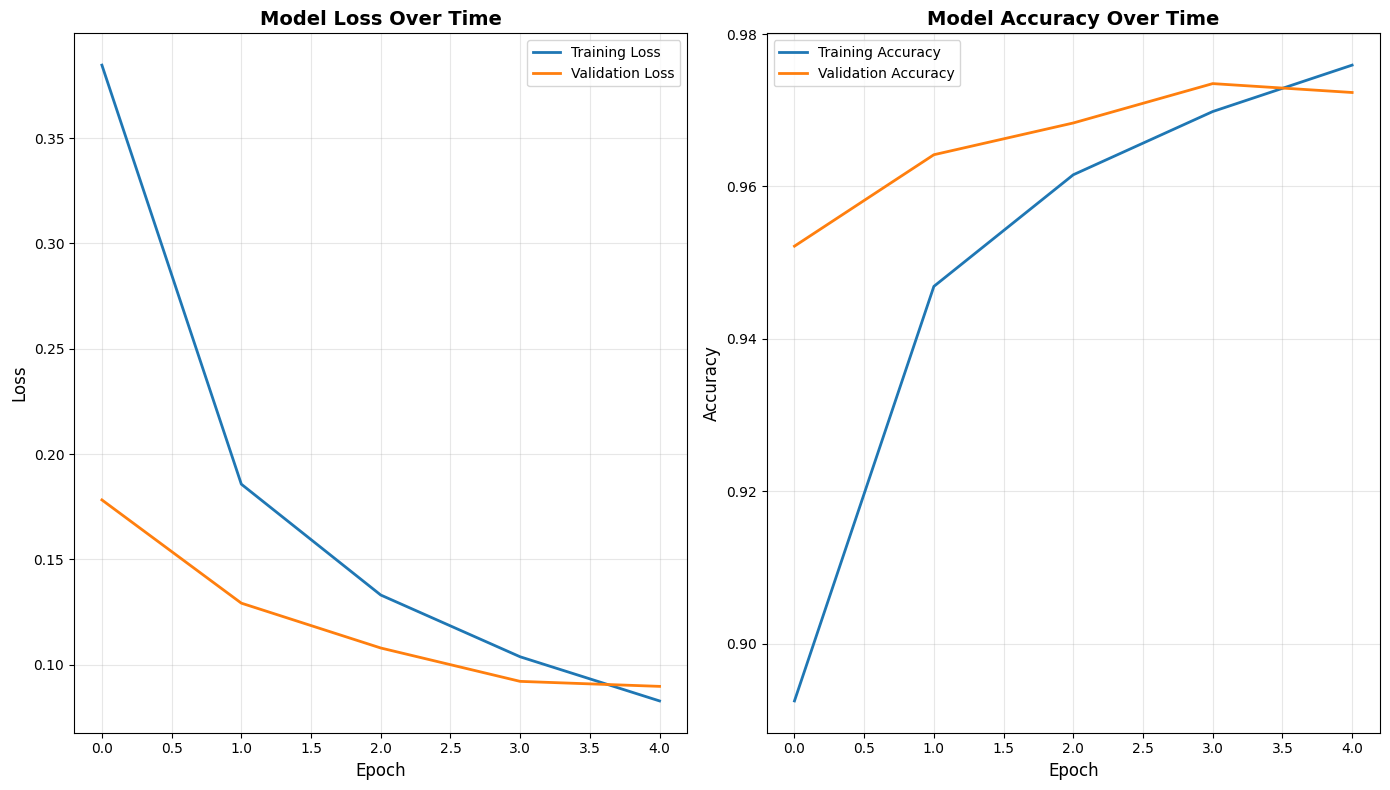

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Plot loss
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Model Loss Over Time', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Model Accuracy Over Time', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('keras_training_history.png', dpi=150, bbox_inches='tight')
print("✓ Saved training history to 'keras_training_history.png'")
plt.show()
plt.close()

In [95]:
# ============================================
# PART 1.8: MAKE PREDICTIONS
# ============================================

In [96]:
print("\n" + "="*60)
print("Making Predictions")
print("="*60)


Making Predictions


In [97]:
# Predict on first 10 test images
predictions = model.predict(x_test_flat[:10], verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test[:10]

In [98]:
# Visualize predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(x_test[i], cmap='gray')
    axes[i].set_title(f'True: {true_classes[i]} | Pred: {predicted_classes[i]}', 
                      color='green' if true_classes[i] == predicted_classes[i] else 'red', 
                      fontweight='bold')
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('keras_predictions.png', dpi=150, bbox_inches='tight')
print("✓ Saved predictions to 'keras_predictions.png'")
plt.close()

print("\n✓ Correct predictions: ", sum(predicted_classes == true_classes), "/10")

✓ Saved predictions to 'keras_predictions.png'

✓ Correct predictions:  9 /10


In [99]:
# ============================================
# PART 1.9: SAVE MODEL
# ============================================

In [100]:
print("\n" + "="*60)
print("Saving Model")
print("="*60)


Saving Model


In [101]:
# Save the entire model
model.save('mnist_keras_model.h5')
print("✓ Saved model to 'mnist_keras_model.h5'")

print("\n💡 You can now load this model anytime:")
print("   loaded_model = keras.models.load_model('mnist_keras_model.h5')")
print("   predictions = loaded_model.predict(new_data)")

✓ Saved model to 'mnist_keras_model.h5'

💡 You can now load this model anytime:
   loaded_model = keras.models.load_model('mnist_keras_model.h5')
   predictions = loaded_model.predict(new_data)


In [102]:
# ============================================
# PART 1.10: EXPERIMENT TIME!
# ============================================

In [103]:
print("\n" + "="*60)
print("🔬 EXPERIMENT: Try Different Optimizers")
print("="*60)

print("\nLet's compare Adam vs SGD:")


🔬 EXPERIMENT: Try Different Optimizers

Let's compare Adam vs SGD:


In [104]:
# Model with SGD
model_sgd = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(10, activation='softmax')
])
model_sgd.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
print("\n🏃 Training with SGD (vanilla gradient descent)...")
history_sgd = model_sgd.fit(
    x_train_flat, 
    y_train_onehot,
    batch_size=128, 
    epochs=5,
    validation_split=0.1, 
    verbose=0
)


🏃 Training with SGD (vanilla gradient descent)...


In [106]:
sgd_accuracy = model_sgd.evaluate(x_test_flat, y_test_onehot, verbose=0)[1]

In [107]:
print("\n📊 Results Comparison:")
print(f"Adam Optimizer: {test_accuracy*100:.2f}%")
print(f"SGD Optimizer:  {sgd_accuracy*100:.2f}%")
print(f"Difference:     {(test_accuracy - sgd_accuracy)*100:.2f}%")
print("\n💡 Adam adapts learning rates per parameter → usually faster & better!")


📊 Results Comparison:
Adam Optimizer: 97.01%
SGD Optimizer:  90.83%
Difference:     6.18%

💡 Adam adapts learning rates per parameter → usually faster & better!


In [108]:
# ============================================
# PART 11: THE REVEAL - WHAT KERAS DID
# ============================================

### 🎓 WHAT KERAS DID FOR US

#### Yesterday's Manual Implementation vs Today's Keras:
```py
┌─────────────────────────────┬──────────────┬──────────────┐
│ Task                        │ Yesterday    │ Today (Keras)│
├─────────────────────────────┼──────────────┼──────────────┤
│ Weight Initialization       │ ~10 lines    │ Automatic    │
│ Forward Pass                │ ~20 lines    │ Automatic    │
│ Loss Computation            │ ~10 lines    │ 1 parameter  │
│ Backpropagation             │ ~40 lines    │ Automatic    │
│ Weight Updates              │ ~10 lines    │ Automatic    │
│ Mini-batch Loop             │ ~20 lines    │ Automatic    │
│ Metrics Tracking            │ ~15 lines    │ Automatic    │
│ Data Shuffling              │ ~5 lines     │ Automatic    │
│ Validation Split            │ Manual       │ 1 parameter  │
│ Model Saving                │ Manual       │ 1 line       │
├─────────────────────────────┼──────────────┼──────────────┤
│ TOTAL                       │ ~200+ lines  │ ~10 lines    │
└─────────────────────────────┴──────────────┴──────────────┘
```

✨ CONGRATULATIONS! ✨

You've completed the Keras introduction!

Key Takeaways:
1. Keras is a high-level API (built on TensorFlow)
2. It automates 95% of the boilerplate code
3. You still understand what's happening underneath!
4. Adam optimizer > vanilla SGD (adaptive learning rates)
5. Validation split helps detect overfitting

Next Up: CNNs - Let's push accuracy to 99%+! 🚀